In [57]:
#General approach described in third cell. Each result file is loaded, sorted after "gap_test" and the best models depicted

#Imports
import pandas as pd
from IPython.display import display
import numpy as np

In [ ]:
#XGBoost

In [58]:
#First generation on scaling to_c_z

#Load the data
table = pd.DataFrame(pd.read_csv("XGB_results_to_c_z.csv", header=0, index_col=0))

#Sort the values after "Gap_test"
table = table.sort_values(["Gap_test"], ascending=False)

#Drop identical attributes across instances
table = table.drop(["VBS_test", "SBS_test", "VBS_train", "SBS_train", "Score_test", "Score_train"], axis = 1)

#Remove the instance name
table = table.reset_index(drop = True)

#Show the first five rows
table = table[:5]
display(table)

,max_depth,learning_rate,n_estimators,min_child_weight,subsample,Accuracy_test,Gap_test,Accuracy_train,Gap_train
0,6.0,0.1,200.0,1.0,0.8,0.7913,0.150508,0.9971,0.982833
1,6.0,0.1,200.0,2.0,0.8,0.7942,0.080845,0.9968,0.982499
2,6.0,0.1,200.0,2.0,1.0,0.7942,0.076622,0.9968,0.980847
3,6.0,0.1,200.0,1.0,1.0,0.7926,0.059384,0.9975,0.981270
4,6.0,0.1,100.0,1.0,0.8,0.7848,0.053339,0.9709,0.924482


In [22]:
#Generation 1 of XGBClassifier
table = pd.DataFrame(pd.read_csv("XGB_results.csv", header=0, index_col=0))
table = table.sort_values(["Gap_test"], ascending=False)
table = table.drop(["VBS_test", "SBS_test", "VBS_train", "SBS_train", "Score_test", "Score_train", "Seed"], axis = 1)
table = table.reset_index(drop = True)
table = table[:5]
display(table)

,max_depth,learning_rate,n_estimators,min_child_weight,subsample,Accuracy_test,Gap_test,Accuracy_train,Gap_train
0,3.0,0.01,100.0,2.0,0.8,0.6788,0.667890,0.6642,0.624179
1,3.0,0.01,100.0,1.0,0.8,0.6786,0.663382,0.6645,0.625261
2,3.0,0.01,100.0,2.0,1.0,0.6783,0.658483,0.6648,0.624107
3,3.0,0.01,100.0,1.0,1.0,0.6783,0.658084,0.6651,0.623914
4,3.0,0.01,200.0,1.0,0.8,0.6812,0.641274,0.6737,0.627049


In [56]:
#Generation 2 of XGBClassifier
table = pd.DataFrame(pd.read_csv("XGB_results2.csv", header=0, index_col=0))

#Total amount of models that performed better on the test set than the SBS (in terms of the gap closure)
amount_better_than_SBS = table.copy()
amount_better_than_SBS = amount_better_than_SBS[amount_better_than_SBS["Gap_test"]>0] 
print(amount_better_than_SBS.loc[:, ["Accuracy_test", "Gap_test"]].describe()) #Print all with a positive "Gap_test"

#General procedure
table = table.sort_values(["Gap_test"], ascending=False)
print(table.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())
table = table.reset_index(drop = True)
table = table[:10]
display(table)

       Accuracy_test    Gap_test
count     216.000000  216.000000
mean        0.678998    0.302367
std         0.005770    0.702210
min         0.673200   -1.217264
25%         0.675300    0.603851
50%         0.677200    0.665752
75%         0.679100    0.672165
max         0.696000    0.681592
       Accuracy_test    Gap_test
count     174.000000  174.000000
mean        0.678915    0.641981
std         0.006279    0.097345
min         0.673200    0.021017
25%         0.675100    0.647852
50%         0.676400    0.668310
75%         0.678800    0.672817
max         0.696000    0.681592
       Accuracy_test    Gap_test  Accuracy_train   Gap_train
count     216.000000  216.000000      216.000000  216.000000
mean        0.678998    0.302367        0.670196    0.241632
std         0.005770    0.702210        0.011665    0.766901
min         0.673200   -1.217264        0.659600   -1.441319
25%         0.675300    0.603851        0.661350    0.610833
50%         0.677200    0.665752        

,max_depth,learning_rate,n_estimators,min_child_weight,subsample,Seed,VBS_test,SBS_test,Accuracy_test,Score_test,Gap_test,VBS_train,SBS_train,Accuracy_train,Score_train,Gap_train
0,3.0,0.001,50.0,2.0,0.8,1.0,1910.833772,5106.399455,0.6780,2928.327679,0.681592,1936.891656,4801.996742,0.6627,2964.306987,0.641404
1,3.0,0.001,100.0,2.0,0.8,1.0,1910.833772,5106.399455,0.6772,2932.234644,0.680369,1936.891656,4801.996742,0.6620,2976.835237,0.637031
2,3.0,0.001,100.0,0.5,0.8,1.0,1910.833772,5106.399455,0.6772,2932.234644,0.680369,1936.891656,4801.996742,0.6622,2976.486518,0.637153
3,3.0,0.001,100.0,1.0,0.8,1.0,1910.833772,5106.399455,0.6767,2934.082739,0.679791,1936.891656,4801.996742,0.6622,2976.486497,0.637153
4,3.0,0.001,50.0,0.5,0.8,1.0,1910.833772,5106.399455,0.6780,2940.479166,0.677789,1936.891656,4801.996742,0.6628,2967.312374,0.640355
5,2.0,0.010,50.0,1.0,0.7,1.0,1910.833772,5106.399455,0.6759,2940.798471,0.677689,1936.891656,4801.996742,0.6612,2984.412505,0.634387
6,2.0,0.010,50.0,2.0,0.7,1.0,1910.833772,5106.399455,0.6759,2940.798471,0.677689,1936.891656,4801.996742,0.6612,2984.412505,0.634387
7,2.0,0.010,50.0,0.5,0.7,1.0,1910.833772,5106.399455,0.6759,2940.798471,0.677689,1936.891656,4801.996742,0.6611,2984.535105,0.634344
8,2.0,0.001,200.0,1.0,0.6,1.0,1910.833772,5106.399455,0.6756,2940.960620,0.677639,1936.891656,4801.996742,0.6608,2982.271926,0.635134
9,2.0,0.001,200.0,2.0,0.6,1.0,1910.833772,5106.399455,0.6756,2940.960620,0.677639,1936.891656,4801.996742,0.6607,2985.616485,0.633966


In [53]:
#Amount of models that outperformed the SBS in terms of the gap close
#Comparison of the first generation of the XGBClassifier on the "instances.csv" and "instances_to_c_z.csv"
table1 = pd.DataFrame(pd.read_csv("XGB_results.csv", header=0, index_col=0))
table2 = pd.DataFrame(pd.read_csv("XGB_results_to_c_z.csv", header=0, index_col=0))
print(table1.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())
print(table2.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())
table1 = table1[table1["Gap_test"]>0]
table2 = table2[table2["Gap_test"]>0]
print(table1.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())
print(table2.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())

       Accuracy_test   Gap_test  Accuracy_train  Gap_train
count      32.000000  32.000000       32.000000  32.000000
mean        0.723091   0.344138        0.790500   0.627000
std         0.029786   0.204767        0.110199   0.190248
min         0.677200   0.005117        0.664200   0.385124
25%         0.705200   0.200399        0.718875   0.497864
50%         0.726300   0.305048        0.749350   0.591270
75%         0.751275   0.493164        0.860025   0.669939
max         0.760100   0.667890        0.992300   0.996167
       Accuracy_test   Gap_test  Accuracy_train  Gap_train
count      32.000000  32.000000       32.000000  32.000000
mean        0.747988  -0.350390        0.835697   0.122554
std         0.041801   0.388358        0.105989   0.739355
min         0.667000  -1.164763        0.672700  -1.299096
25%         0.733075  -0.536197        0.787575  -0.110602
50%         0.760100  -0.248047        0.835400   0.280203
75%         0.778125  -0.079506        0.883700   0.5600

In [ ]:
#SVM

In [59]:
#Only one table for both generation (36 models in total)
table = pd.DataFrame(pd.read_csv("SVM_results.csv", header=0, index_col=0))
print(table.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())
table = table.sort_values(["Gap_test"], ascending=False)
display(table)

       Accuracy_test   Gap_test  Accuracy_train  Gap_train
count      36.000000  36.000000       36.000000  36.000000
mean        0.530492  -2.094133        0.694128  -1.251683
std         0.128563   2.632910        0.214026   2.885008
min         0.129300  -8.653757        0.119800  -9.721175
25%         0.459975  -4.348523        0.607825  -2.949924
50%         0.592550  -0.937007        0.649850   0.021047
75%         0.616000   0.000000        0.836300   0.367954
max         0.619500   0.040711        1.000000   1.000000


,C,kernel,class_weight,degree,VBS_test,SBS_test,Accuracy_test,Score_test,Gap_test,VBS_train,SBS_train,Accuracy_train,Score_train,Gap_train
SVM_C_0.9_kernel_rbf_classweight_None_degree_3,0.90,rbf,NaN,3.0,1910.833772,5106.399455,0.6179,4976.304403,0.040711,1936.891656,4801.996742,0.7502,4225.188890,0.201322
SVM_C_0.1_kernel_rbf_classweight_None_degree_3,0.10,rbf,NaN,3.0,1910.833772,5106.399455,0.6160,4983.015718,0.038611,1936.891656,4801.996742,0.6183,4676.818013,0.043691
SVM_C_0.7_kernel_rbf_classweight_None_degree_3,0.70,rbf,NaN,3.0,1910.833772,5106.399455,0.6160,4983.015718,0.038611,1936.891656,4801.996742,0.6617,4517.807353,0.099190
SVM_C_0.2_kernel_rbf_classweight_None_degree_3,0.20,rbf,NaN,3.0,1910.833772,5106.399455,0.6160,4983.015718,0.038611,1936.891656,4801.996742,0.6183,4676.818013,0.043691
SVM_C_0.5_kernel_rbf_classweight_None_degree_3,0.50,rbf,NaN,3.0,1910.833772,5106.399455,0.6160,4983.015718,0.038611,1936.891656,4801.996742,0.6235,4654.934446,0.051329
SVM_C_0.3_kernel_rbf_classweight_None_degree_3,0.30,rbf,NaN,3.0,1910.833772,5106.399455,0.6160,4983.015718,0.038611,1936.891656,4801.996742,0.6183,4676.818013,0.043691
SVM_C_1_kernel_rbf_classweight_None_degree_3,1.00,rbf,NaN,3.0,1910.833772,5106.399455,0.6195,5007.938476,0.030812,1936.891656,4801.996742,0.7942,4046.157315,0.263809
SVM_C_0.01_kernel_poly_classweight_None_degree_3,0.01,poly,NaN,3.0,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5932,4776.493391,0.008901
SVM_C_0.01_kernel_rbf_classweight_None_degree_3,0.01,rbf,NaN,3.0,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000
SVM_C_0.01_kernel_poly_classweight_None_degree_2,0.01,poly,NaN,2.0,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000


In [ ]:
#MLP

In [64]:
#First generation of MLP models
table = pd.DataFrame(pd.read_csv("MLP_results.csv", header=0, index_col=0))
print(table.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())
table = table.sort_values(["Gap_test"], ascending=False)

#Calculate the amount of underfitting models
underfitting_models = table[table.Gap_test == 0]
print("Amount of underfitting models: " + str(len(underfitting_models)))

table = table[:15]
display(table)

       Accuracy_test    Gap_test  Accuracy_train   Gap_train
count     192.000000  192.000000      192.000000  192.000000
mean        0.550481   -1.252272        0.666831   -0.424666
std         0.076873    1.962903        0.184603    2.049965
min         0.129300   -9.598629        0.119800  -10.662625
25%         0.539425   -2.247055        0.587200   -0.004541
50%         0.586300    0.000000        0.587200    0.000000
75%         0.586300    0.000000        0.833425    0.000000
max         0.606700    0.000420        1.000000    1.000000
Amount of underfitting models: 96


,model,epochs,weights,criterion,optimizer,learning_rate,L1_norm,VBS_test,SBS_test,Accuracy_test,Score_test,Gap_test,VBS_train,SBS_train,Accuracy_train,Score_train,Gap_train
MLP_modelID_3_weights_normal_optimizer_SGD_learningrate_0.01_l1Norm_0.0001,Large_Dropout,200.0,normal,CrossEntropyLoss,SGD,0.0100,0.0001,1910.833772,5106.399455,0.5868,5105.056378,4.202941e-04,1936.891656,4801.996742,0.5873,4801.661205,0.000117
MLP_modelID_3_weights_normal_optimizer_SGD_learningrate_0.01_l1Norm_0,Large_Dropout,200.0,normal,CrossEntropyLoss,SGD,0.0100,0.0000,1910.833772,5106.399455,0.5865,5106.398092,4.265369e-07,1936.891656,4801.996742,0.5873,4804.008512,-0.000702
MLP_modelID_2_weights_balanced_optimizer_SGD_learningrate_1_l1Norm_0,Small,200.0,balanced,CrossEntropyLoss,SGD,1.0000,0.0000,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_4_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0.0001,Large,200.0,balanced,CrossEntropyLoss,SGD,0.0100,0.0001,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_2_weights_normal_optimizer_Adam_learningrate_1_l1Norm_0.0001,Small,200.0,normal,CrossEntropyLoss,Adam,1.0000,0.0001,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_2_weights_normal_optimizer_Adam_learningrate_1_l1Norm_0,Small,200.0,normal,CrossEntropyLoss,Adam,1.0000,0.0000,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_4_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0,Large,200.0,balanced,CrossEntropyLoss,SGD,0.0100,0.0000,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_2_weights_normal_optimizer_Adam_learningrate_0.1_l1Norm_0,Small,200.0,normal,CrossEntropyLoss,Adam,0.1000,0.0000,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_4_weights_balanced_optimizer_SGD_learningrate_0.0003_l1Norm_0.0001,Large,200.0,balanced,CrossEntropyLoss,SGD,0.0003,0.0001,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_4_weights_balanced_optimizer_Adam_learningrate_0.1_l1Norm_0,Large,200.0,balanced,CrossEntropyLoss,Adam,0.1000,0.0000,1910.833772,5106.399455,0.5863,5106.399455,0.000000e+00,1936.891656,4801.996742,0.5872,4801.996742,0.000000


In [67]:
#Second generation of MLP models
table = pd.DataFrame(pd.read_csv("MLP_results2.csv", header=0, index_col=0))
print(table.loc[:, ["Accuracy_test", "Gap_test", "Accuracy_train", "Gap_train"]].describe())
table = table.sort_values(["Gap_test"], ascending=False)

#Calculate the amount of underfitting models
underfitting_models = table[table.Gap_test == 0]
print("Amount of underfitting models: " + str(len(underfitting_models)))

table = table[:15]
display(table)

       Accuracy_test    Gap_test  Accuracy_train   Gap_train
count     192.000000  192.000000      192.000000  192.000000
mean        0.557578   -1.242049        0.728368    0.143589
std         0.043381    1.436756        0.164154    0.528942
min         0.445100   -4.097955        0.587200   -1.221926
25%         0.533075   -2.479323        0.587200    0.000000
50%         0.586300   -0.076990        0.663300    0.000000
75%         0.586300    0.000000        0.880825    0.545655
max         0.611200    0.008941        1.000000    1.000000
Amount of underfitting models: 87


,model,dropout,activation,epochs,weights,criterion,optimizer,learning_rate,L1_norm,L2_norm,VBS_test,SBS_test,Accuracy_test,Score_test,Gap_test,VBS_train,SBS_train,Accuracy_train,Score_train,Gap_train
MLP_modelID_8_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0.001_l2Norm_0.01,Very_Large_Leaky,No,Leaky ReLU,200.0,balanced,CrossEntropyLoss,SGD,0.01,0.001,0.0100,1910.833772,5106.399455,0.5935,5077.828221,0.008941,1936.891656,4801.996742,0.6180,4690.462641,0.038928
MLP_modelID_8_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0_l2Norm_0.01,Very_Large_Leaky,No,Leaky ReLU,200.0,balanced,CrossEntropyLoss,SGD,0.01,0.000,0.0100,1910.833772,5106.399455,0.5879,5099.412340,0.002187,1936.891656,4801.996742,0.6469,4223.346248,0.201965
MLP_modelID_8_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0_l2Norm_0,Very_Large_Leaky,No,Leaky ReLU,200.0,balanced,CrossEntropyLoss,SGD,0.01,0.000,0.0000,1910.833772,5106.399455,0.5865,5105.057725,0.000420,1936.891656,4801.996742,0.6002,4748.737471,0.018589
MLP_modelID_6_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0_l2Norm_0,Very_Large,No,ReLU,200.0,balanced,CrossEntropyLoss,SGD,0.01,0.000,0.0000,1910.833772,5106.399455,0.5863,5105.650236,0.000234,1936.891656,4801.996742,0.6230,4294.525410,0.177121
MLP_modelID_7_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0.001_l2Norm_0.01,Very_Large_Dropout_Leaky,Yes,Leaky ReLU,200.0,balanced,CrossEntropyLoss,SGD,0.01,0.001,0.0100,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_5_weights_balanced_optimizer_SGD_learningrate_0.01_l1Norm_0.001_l2Norm_0.0001,Very_Large_Dropout,Yes,ReLU,200.0,balanced,CrossEntropyLoss,SGD,0.01,0.001,0.0001,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_7_weights_normal_optimizer_Adam_learningrate_0.1_l1Norm_0_l2Norm_0.0001,Very_Large_Dropout_Leaky,Yes,Leaky ReLU,200.0,normal,CrossEntropyLoss,Adam,0.10,0.000,0.0001,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_5_weights_normal_optimizer_SGD_learningrate_0.01_l1Norm_0.001_l2Norm_0.0001,Very_Large_Dropout,Yes,ReLU,200.0,normal,CrossEntropyLoss,SGD,0.01,0.001,0.0001,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_8_weights_balanced_optimizer_Adam_learningrate_0.01_l1Norm_0.001_l2Norm_0,Very_Large_Leaky,No,Leaky ReLU,200.0,balanced,CrossEntropyLoss,Adam,0.01,0.001,0.0000,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000
MLP_modelID_7_weights_balanced_optimizer_SGD_learningrate_0.1_l1Norm_0_l2Norm_0.0001,Very_Large_Dropout_Leaky,Yes,Leaky ReLU,200.0,balanced,CrossEntropyLoss,SGD,0.10,0.000,0.0001,1910.833772,5106.399455,0.5863,5106.399455,0.000000,1936.891656,4801.996742,0.5872,4801.996742,0.000000


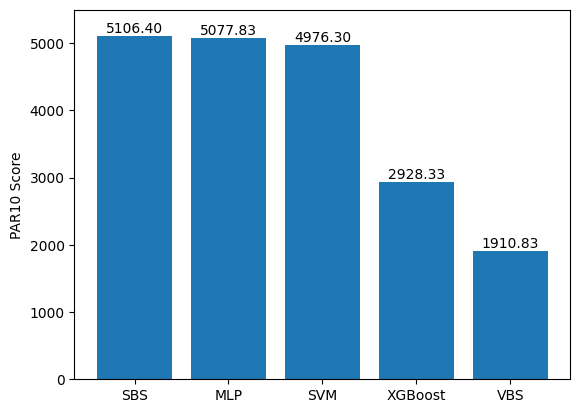

In [90]:
#Barplot to visualize the best results on the test set
import matplotlib.pyplot as plt
import os

#Values from the previous tables, the values are biased towards the test set
scores = {'SBS': [5106.399455], 'MLP': [5077.828221], 'SVM': [4976.304403], 'XGBoost': [2928.327679], 'VBS': [1910.833772]}
scores = pd.DataFrame(scores)

#Extract the values and labels from the DataFrame
values = scores.iloc[0].values
labels = scores.columns.values

#Bar plot
plt.bar(labels, values)

#Increase y-axis limits
plt.ylim(0, 5500)

#Add value annotations with two decimal places to each bar
for i, v in enumerate(values):
    plt.text(i, v+50, '{:.2f}'.format(v), ha='center')

#Set title and labels
#plt.title("Results of the best models on the test set")
plt.ylabel("PAR10 Score")

#Save the figure in the directory "AAS"
plt.savefig("models_results.pdf")

#Display
plt.show()